In [2]:
import numpy as np
from matplotlib import pyplot as plt

import pandas as pd

# The problem

Given that the only thing that matters in the kinematic equations is the vertical speed. We will learn a regression tree to predict this thing.

In [3]:
# Load the data from CSV file
df = pd.read_csv('/Users/thinhhoang/Documents/anomaly_localization_lfbo/LFPO_STANDARDIZED_CLEANED.csv')
df.head()

,Unnamed: 0,X,TRAJ_ID,PLOT_DATE,TIME_TU_S,THR_DIST_NM,LONGITUDE,LATITUDE,ALTITUDE_STD_FT,HEIGHT_FT,GRND_SPD_KT,VERT_SPD_FTM,TRUE_AIR_SPD_KT,SPE_KINE_ENRGY_JKG,SPE_POT_ENRGY_JKG,SPE_TOT_ENRGY_JKG,ATYPICAL_ENRGY_COEF,ID,Y
0,1.0,6.245135e+06,2072,01:22:20,7320,24.778017,2.998070,48.836302,6651.540866,6364.540866,224.0,-1044.531250,225.970817,4.100704e+08,1.175348e+09,1.585418e+09,3.990644e-14,1,476874.879242
1,2.0,6.245017e+06,2072,01:22:24,7324,24.529126,2.992004,48.835233,6575.298003,6288.298003,224.0,-1150.000000,226.091091,4.100704e+08,1.161268e+09,1.571338e+09,1.649552e-14,2,475902.743197
2,3.0,6.244906e+06,2072,01:22:28,7328,24.281039,2.985942,48.834209,6499.591347,6212.591347,223.0,-1150.000000,225.020516,4.064172e+08,1.147287e+09,1.553704e+09,8.221491e-15,3,474931.590998
3,4.0,6.244792e+06,2072,01:22:32,7332,24.033544,2.979901,48.833171,6428.522931,6141.522931,222.0,-1170.000000,225.221207,4.027804e+08,1.134163e+09,1.536943e+09,4.906020e-15,4,473963.646759
4,5.0,6.244669e+06,2072,01:22:36,7336,23.786858,2.973902,48.832083,6347.174771,6060.174771,222.0,-1127.734375,226.176578,4.027804e+08,1.119140e+09,1.521921e+09,3.438460e-15,5,473001.907398


In [11]:
# Column names of df
print('Column names of df: ', df.columns)

Column names of df:  Index(['Unnamed: 0', 'X', 'TRAJ_ID', 'PLOT_DATE', 'TIME_TU_S', 'THR_DIST_NM',
       'LONGITUDE', 'LATITUDE', 'ALTITUDE_STD_FT', 'HEIGHT_FT', 'GRND_SPD_KT',
       'VERT_SPD_FTM', 'TRUE_AIR_SPD_KT', 'SPE_KINE_ENRGY_JKG',
       'SPE_POT_ENRGY_JKG', 'SPE_TOT_ENRGY_JKG', 'ATYPICAL_ENRGY_COEF', 'ID',
       'Y'],
      dtype='object')


In [22]:
# A helper function to process the time string
def time_string_to_sec_from_midnight(time_string):
    time_string_split = time_string.split(':')
    hour = int(time_string_split[0])
    minute = int(time_string_split[1])
    second = int(time_string_split[2])
    return hour * 3600 + minute * 60 + second

In [24]:
# Add another column to df to store the time in seconds from midnight
df['time_sec_from_midnight'] = df['PLOT_DATE'].apply(time_string_to_sec_from_midnight)

In [25]:
df.head()

,Unnamed: 0,X,TRAJ_ID,PLOT_DATE,TIME_TU_S,THR_DIST_NM,LONGITUDE,LATITUDE,ALTITUDE_STD_FT,HEIGHT_FT,GRND_SPD_KT,VERT_SPD_FTM,TRUE_AIR_SPD_KT,SPE_KINE_ENRGY_JKG,SPE_POT_ENRGY_JKG,SPE_TOT_ENRGY_JKG,ATYPICAL_ENRGY_COEF,ID,Y,time_sec_from_midnight
0,1.0,6.245135e+06,2072,01:22:20,7320,24.778017,2.998070,48.836302,6651.540866,6364.540866,224.0,-1044.531250,225.970817,4.100704e+08,1.175348e+09,1.585418e+09,3.990644e-14,1,476874.879242,4940
1,2.0,6.245017e+06,2072,01:22:24,7324,24.529126,2.992004,48.835233,6575.298003,6288.298003,224.0,-1150.000000,226.091091,4.100704e+08,1.161268e+09,1.571338e+09,1.649552e-14,2,475902.743197,4944
2,3.0,6.244906e+06,2072,01:22:28,7328,24.281039,2.985942,48.834209,6499.591347,6212.591347,223.0,-1150.000000,225.020516,4.064172e+08,1.147287e+09,1.553704e+09,8.221491e-15,3,474931.590998,4948
3,4.0,6.244792e+06,2072,01:22:32,7332,24.033544,2.979901,48.833171,6428.522931,6141.522931,222.0,-1170.000000,225.221207,4.027804e+08,1.134163e+09,1.536943e+09,4.906020e-15,4,473963.646759,4952
4,5.0,6.244669e+06,2072,01:22:36,7336,23.786858,2.973902,48.832083,6347.174771,6060.174771,222.0,-1127.734375,226.176578,4.027804e+08,1.119140e+09,1.521921e+09,3.438460e-15,5,473001.907398,4956


In [26]:
traj_id_list = df['TRAJ_ID'].unique()
print('Trajectory ID list: ', traj_id_list)

Trajectory ID list:  [ 2072  2076  2078 ... 30282 30296 31972]


Chosen trajectory IDs:  [ 6211 21593  9479 10291 13156]


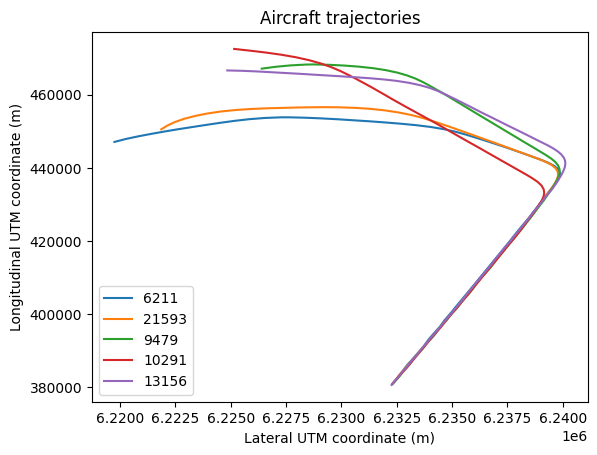

Text(0, 0.5, 'Vertical speed (ft/min)')

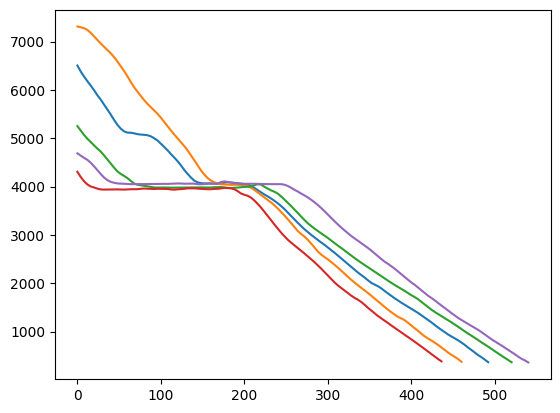

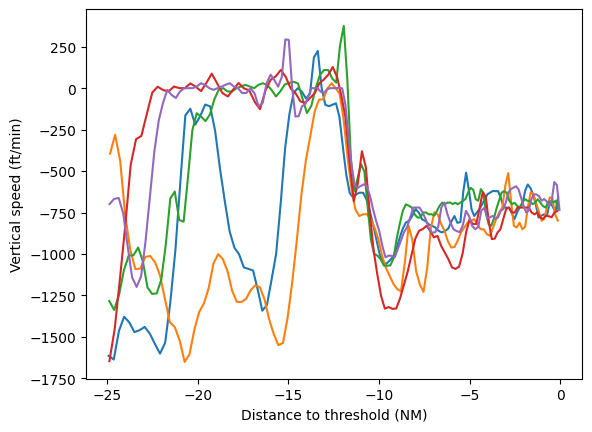

In [32]:
# Visualize several aircraft trajectories
np.random.seed(6969)
chosen_traj_ids = np.random.choice(traj_id_list, 5)
print('Chosen trajectory IDs: ', chosen_traj_ids)

for chosen_traj_id in chosen_traj_ids:
    chosen_traj = df[df['TRAJ_ID'] == chosen_traj_id]
    plt.plot(chosen_traj['X'], chosen_traj['Y'], label=chosen_traj_id)
    
# Trajectories
plt.xlabel('Lateral UTM coordinate (m)')
plt.ylabel('Longitudinal UTM coordinate (m)')
plt.title('Aircraft trajectories')
plt.legend()
plt.show()

# Vertical profile
for chosen_traj_id in chosen_traj_ids:
    chosen_traj = df[df['TRAJ_ID'] == chosen_traj_id]
    time_first_appear = chosen_traj['time_sec_from_midnight'].iloc[0]
    plt.plot(chosen_traj['time_sec_from_midnight'] - time_first_appear, chosen_traj['ALTITUDE_STD_FT'], label=chosen_traj_id)

plt.figure()

# Vertical speed
for chosen_traj_id in chosen_traj_ids:
    chosen_traj = df[df['TRAJ_ID'] == chosen_traj_id]
    time_first_appear = chosen_traj['time_sec_from_midnight'].iloc[0]
    plt.plot(-chosen_traj['THR_DIST_NM'], chosen_traj['VERT_SPD_FTM'], label=chosen_traj_id)
plt.xlabel('Distance to threshold (NM)')
plt.ylabel('Vertical speed (ft/min)')

In [128]:
dist_vec = []
vspd_vec = []

for id in traj_id_list:
    vspd_curve = df[df['TRAJ_ID'] == id]['VERT_SPD_FTM'].values
    dist_curve = df[df['TRAJ_ID'] == id]['THR_DIST_NM'].values
    #plt.plot(vspd_curve, label=id)
    # Find peaks and valleys
    peaks, _ = find_peaks(vspd_curve, prominence=150)
    valleys, _ = find_peaks(-vspd_curve, prominence=150)
    #plt.plot(peaks, vspd_curve[peaks], "x")
    #plt.plot(valleys, vspd_curve[valleys], "o")
    dist_vec.append(dist_curve[peaks].flatten().tolist())
    vspd_vec.append(vspd_curve[peaks].flatten().tolist())
    dist_vec.append(dist_curve[valleys].flatten().tolist())
    vspd_vec.append(vspd_curve[valleys].flatten().tolist())
    
# dist_vec is a nested list, unpack it
dist_vec = [item for sublist in dist_vec for item in sublist]
vspd_vec = [item for sublist in vspd_vec for item in sublist]

# convert to numpy array
dist_vec = np.array(dist_vec)
vspd_vec = np.array(vspd_vec)

Text(0, 0.5, 'Vertical speed (ft/min)')

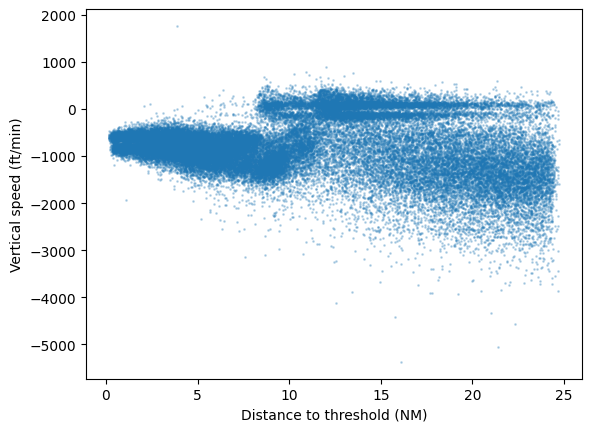

In [145]:
plt.scatter(dist_vec, vspd_vec, s=1, alpha=0.25)
plt.xlabel('Distance to threshold (NM)')
plt.ylabel('Vertical speed (ft/min)')

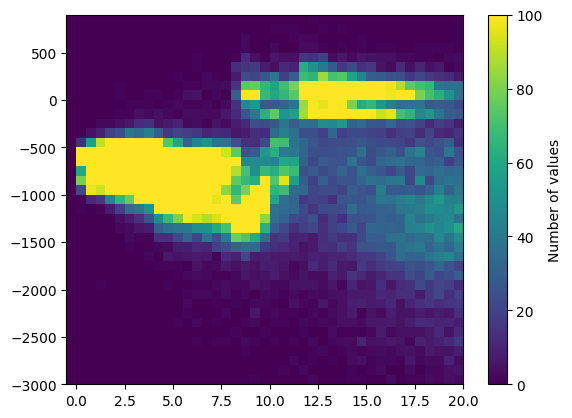

In [187]:
# Find confidence interval of vertical speed for each distance to threshold
# Use a 2D histogram
import matplotlib as mpl
# Define the bins
dist_bins = np.arange(-0.5, 20.5, 0.5)
vspd_bins = np.arange(-3000, 1000, 100)

# Compute the histogram
hist, xedges, yedges = np.histogram2d(dist_vec, vspd_vec, bins=(dist_bins, vspd_bins))

# Plot the histogram
X, Y = np.meshgrid(xedges, yedges)
plt.pcolormesh(X, Y, hist.T, cmap=mpl.cm.viridis, norm=mpl.colors.Normalize(vmin=0, vmax=100))
plt.colorbar(label='Number of values')

In [192]:
hist[1,:] #at the second bin of distance

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,  21.,  79.,
        60., 107., 147.,  14.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.])